In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
bdd_gms <- read_csv('gms_bdd.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  dataset = col_character(),
  method = col_character(),
  metric = col_character(),
  object_class = col_character(),
  q2 = col_double(),
  q5 = col_double(),
  q8 = col_double(),
  recall = col_double(),
  order_key = col_character(),
  norder_key = col_double()
)



In [3]:
library(ggplot2)

In [4]:
bdd_gms2 <- filter(bdd_gms, !object_class %in% c('geomean'))

In [5]:
bdd_gms2

X1,dataset,method,metric,object_class,q2,q5,q8,recall,order_key,norder_key
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0,bdd,BlazeIt,savings in frames,bike,1.19852941,1.19852941,1.19852941,0.1,"('bdd', 'bike')",2
1,bdd,BlazeIt,time savings,bike,0.11880622,0.11880622,0.11880622,0.1,"('bdd', 'bike')",2
2,bdd,BlazeIt,savings in frames,bus,1.01652893,1.01652893,1.01652893,0.1,"('bdd', 'bus')",5
3,bdd,BlazeIt,time savings,bus,0.09064232,0.09064232,0.09064232,0.1,"('bdd', 'bus')",5
4,bdd,BlazeIt,savings in frames,motor,0.98857143,0.98857143,0.98857143,0.1,"('bdd', 'motor')",3
5,bdd,BlazeIt,time savings,motor,0.12260964,0.12260964,0.12260964,0.1,"('bdd', 'motor')",3
6,bdd,BlazeIt,savings in frames,person,0.97297297,0.97297297,0.97297297,0.1,"('bdd', 'person')",1
7,bdd,BlazeIt,time savings,person,0.10404759,0.10404759,0.10404759,0.1,"('bdd', 'person')",1
8,bdd,BlazeIt,savings in frames,rider,0.90643275,0.90643275,0.90643275,0.1,"('bdd', 'rider')",4


In [255]:
#filter(gms2, object_class %in% c('geomean'))

In [281]:
levels_dashcam = c('bicycle', 'person', 'traffic light', 'fire hydrant', 'stop sign', 'bus', 'truck')
levels_bdd = c('person', 'bike', 'motor', 'rider', 'bus', 'truck',
       'traffic light', 'traffic sign')

In [314]:
dat = gms2 # bdd_gms2
dataset_name = 'Dashcam' # "BDD"
levels = levels_dashcam # levels_bdd

pt = (ggplot(dat, aes(y=q5, x=factor(object_class, levels=levels), fill=method, fill_alpha=.6))
        + geom_bar(stat='identity', position='dodge')
        + geom_hline(mapping=aes(yintercept=1.,), linetype='dashed')
        + facet_grid(rows=vars(recall), cols=vars(metric), 
                      labeller='label_both', scales='free_y')
        + scale_y_log10()
        + ylab(element_blank())
        + xlab(element_blank())
        + geom_vline(xintercept=seq(1.5, length(unique(dat$object_class))-0.5, 1), lwd=1, colour="white")
        + labs(title = sprintf("Savings on %s dataset", dataset_name))
        + theme(plot.title=element_text(hjust = .5, size=15),
                legend.title=element_blank(),
                legend.position='top',
                panel.grid.major.x = element_blank() ,
                strip.text=element_text(size=14),
                legend.margin=margin(t=0, b=0),
                legend.box.margin=margin(0,0,0,0),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12, angle=90, hjust = 1, vjust=.5),
                legend.text=element_text(size=13))
     )

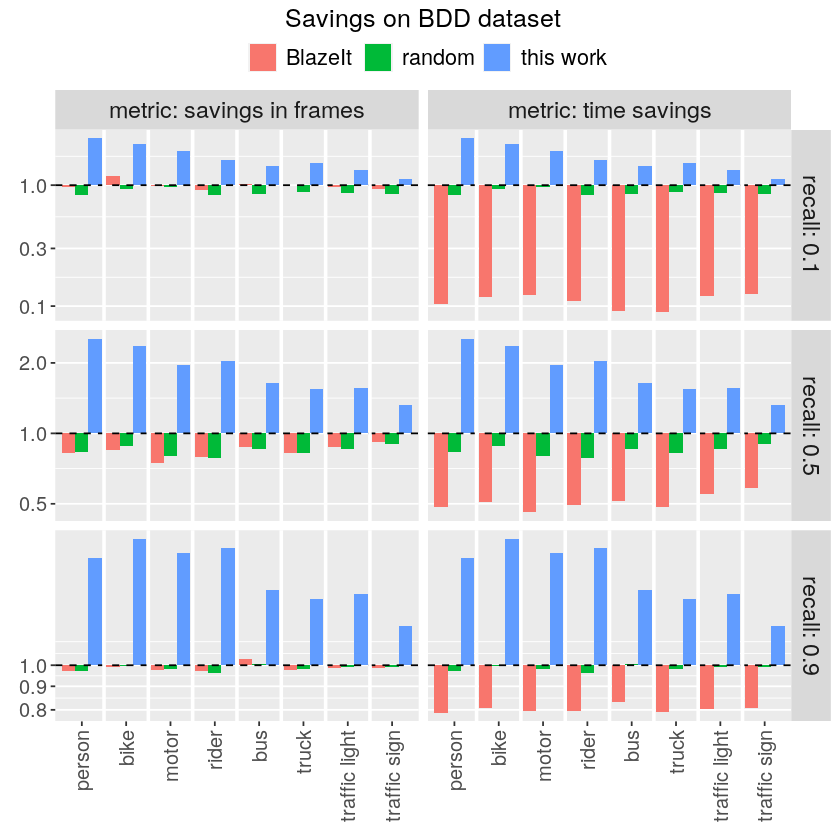

In [312]:
pt

In [313]:
ggsave('/tmp/bdd.pdf', pt)

Saving 6.67 x 6.67 in image



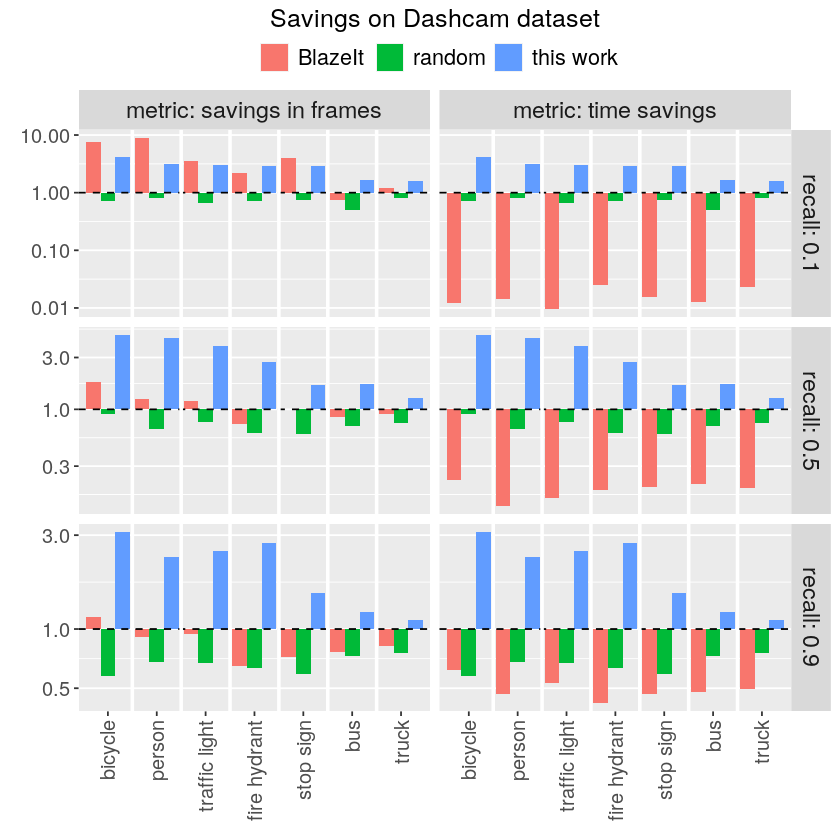

In [315]:
pt

In [317]:
ggsave('/tmp/dashcam.pdf', pt)

Saving 6.67 x 6.67 in image

